In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
f = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\Geron2\datasets\titanic'

In [3]:
# set pandas display options to show full table
def set_pandas_display_options() -> None:
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [4]:
try:
    train = pd.read_csv(os.path.join(f,'train.csv'), index_col='PassengerId')
    test = pd.read_csv(os.path.join(f,'test.csv'), index_col='PassengerId')
except:
    train = pd.read_csv(os.path.join('data','train.csv'), index_col='PassengerId')
    test = pd.read_csv(os.path.join('data','test.csv'), index_col='PassengerId')
print(train.shape,test.shape)

explore = train.copy()

(891, 11) (418, 10)


The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: C = Cherbourg, Q = Queenstown, S = Southampton

## 1. Data Exploration

In [5]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Cols having missing values: *Age, cabin, and Embarked***

<br>

In [6]:
# check if classes are evenly distributed
explore.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
# investigate age missing rows
train[(train.Age.isna()) & (train.Pclass==3)].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S


**Conclusion: no evidence of missing age due to child-fare**

<br>

In [8]:
explore.pivot_table('Name',columns='Sex',index='Survived',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [9]:
explore.pivot_table('Name',columns='Embarked',index='Survived',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [10]:
# explore.Ticket.value_counts()

In [11]:
# explore.Ticket.astype(str)

In [12]:
# explore[explore.Ticket.str.len()<7].sort_values(by='Ticket')

In [13]:
explore.Fare = explore.Fare.round(-1)
explore.pivot_table('Name',columns='Fare',index='Survived',aggfunc='count')

Fare,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,110.0,120.0,130.0,140.0,150.0,160.0,210.0,220.0,230.0,250.0,260.0,510.0
Survived,,,,,,,,,,,,,,,,,,,,,,
0,16.0,327.0,54.0,76.0,16.0,17.0,6.0,14.0,8.0,1.0,4.0,NaN,NaN,1.0,3.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN
1,1.0,113.0,46.0,59.0,12.0,13.0,19.0,5.0,23.0,12.0,7.0,4.0,4.0,2.0,6.0,2.0,3.0,NaN,3.0,1.0,4.0,3.0


In [14]:
explore.pivot_table('Age',index='Survived',aggfunc='mean')

,Age
Survived,
0,30.626179
1,28.343690


In [15]:
explore.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,33.01908
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.25032
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,10.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.00000
max,1.000000,3.000000,80.000000,8.000000,6.000000,510.00000


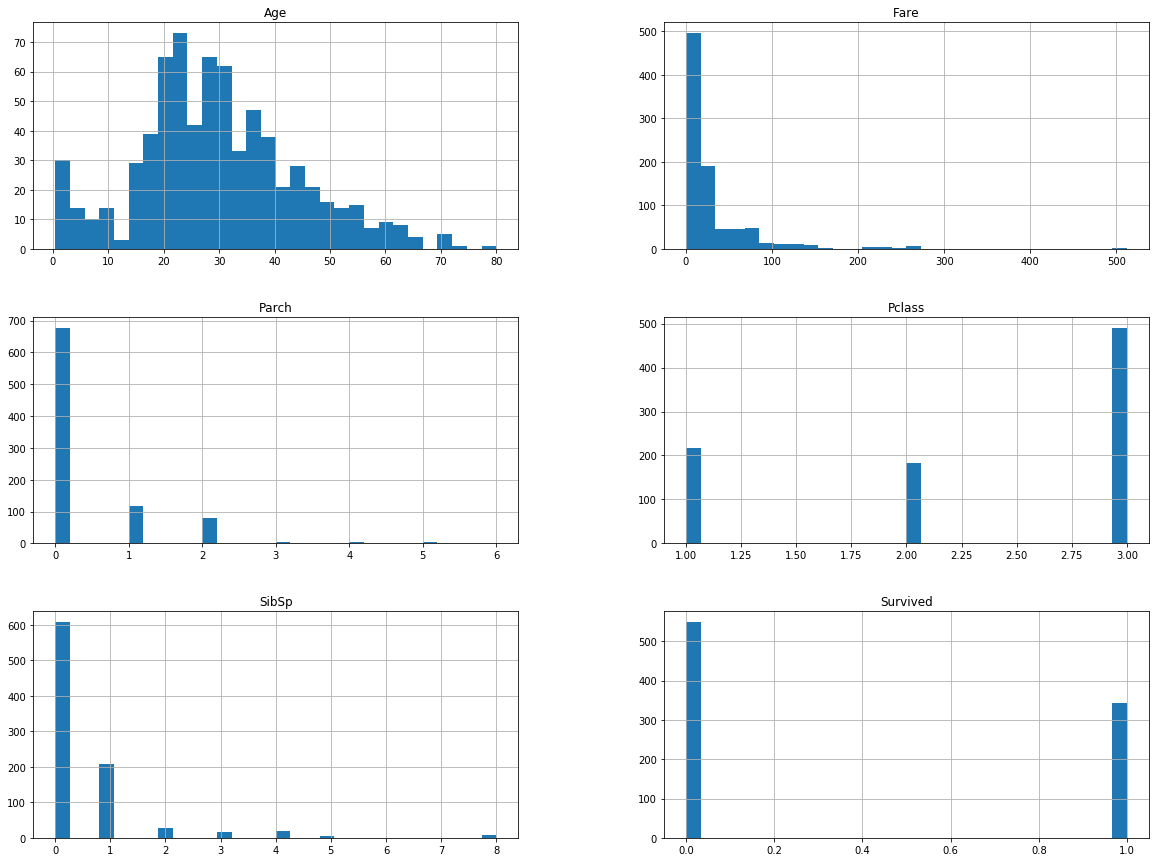

In [16]:
train.hist(bins=30,figsize=(20,15))
plt.show()

## 2. Feature Engineering 

>**1. process name**

In [17]:
# examine names
noble = ['Duke.','Duchess.','Marquess.','Marchioness.','Lord.','Lady.','Earl.','Countess.','Honourable.',
    'Viscount','Viscountess','Baron','Baroness','Knight.']
Ms = ['Mrs.', 'Miss.']

explore['Noble'] = explore['Name'].str.contains('|'.join(noble))

In [18]:
explore.pivot_table('Name',columns='Noble',index='Survived',aggfunc='count')

Noble,False,True
Survived,,
0,548,1
1,340,2


**Noble not worth it**

> **2. Mean encoding**

In [19]:
explore.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare         22
Cabin       147
Embarked      3
Noble         2
dtype: int64

**only `Embarked` is fit for mean encoding**

In [20]:
explore['Embarked_me']=explore.groupby('Embarked')['Survived'].transform('mean')
explore['Embarked_me'].fillna(explore['Survived'].mean(), inplace=True)

explore['Cabin1'] = explore.Cabin.str[0]
explore['Cabin_me']=explore.groupby('Cabin1')['Survived'].transform('mean')
explore['Cabin_me'].fillna(explore['Survived'].mean(), inplace=True)
explore.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Noble,Embarked_me,Cabin1,Cabin_me
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,10.0,NaN,S,False,0.336957,NaN,0.383838
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,70.0,C85,C,False,0.553571,C,0.593220
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0,NaN,S,False,0.336957,NaN,0.383838
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,50.0,C123,S,False,0.336957,C,0.593220
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,10.0,NaN,S,False,0.336957,NaN,0.383838


In [21]:
explore['Embarked_me'].unique()

array([0.33695652, 0.55357143, 0.38961039, 0.38383838])

In [22]:
explore['Cabin_me'].unique()

array([0.38383838, 0.59322034, 0.75      , 0.5       , 0.75757576,
       0.46666667, 0.74468085, 0.61538462, 0.        ])

In [23]:
np.corrcoef(explore['Survived'].values, explore['Embarked_me'].values)[0][1].round(2), np.corrcoef(explore['Survived'].values, 
                                                                                                    explore['Cabin_me'].values)[0][1].round(2)

(0.17, 0.33)

**Regularize using KFold**

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=12, shuffle=True)

explore['Embarked_me_cv']=explore['Embarked_me']
explore['Cabin_me_cv']=explore['Cabin_me']

for train_index, val_index in kf.split(explore):
    train, val = explore.iloc[train_index], explore.iloc[val_index]
    embark_means = val['Embarked'].map(train.groupby('Embarked')['Survived'].mean())
    cabin_means = val['Cabin1'].map(train.groupby('Cabin1')['Survived'].mean())
    explore.iloc[val_index, -2] = embark_means
    explore.iloc[val_index, -1] = cabin_means

explore['Embarked_me_cv'].fillna(explore['Survived'].mean(), inplace=True)
explore['Cabin_me_cv'].fillna(explore['Survived'].mean(), inplace=True)

In [25]:
explore['Embarked_me_cv'].unique()

array([0.36170213, 0.52671756, 0.32156863, 0.32239382, 0.33846154,
       0.45762712, 0.34050881, 0.40625   , 0.54545455, 0.39344262,
       0.56934307, 0.33333333, 0.53787879, 0.58571429, 0.38383838,
       0.36065574])

In [26]:
explore['Cabin_me_cv'].unique()

array([0.38383838, 0.55555556, 0.58536585, 0.80769231, 0.5       ,
       0.77777778, 0.42857143, 0.73684211, 0.7027027 , 0.60869565,
       0.78378378, 0.66666667, 0.76      , 0.46153846, 0.7826087 ,
       0.62      , 0.74358974, 0.6       , 0.54545455, 0.75675676,
       0.70833333, 0.72413793, 0.75      , 0.73333333, 0.33333333,
       0.58333333, 0.78571429])

In [27]:
np.corrcoef(explore['Survived'].values, 
            explore['Embarked_me_cv'].values)[0][1].round(2), np.corrcoef(explore['Survived'].values, 
                                                                            explore['Cabin_me_cv'].values)[0][1].round(2)

(0.13, 0.3)

**Regularize using Expanding mean**

In [28]:
for feature in ['Embarked','Cabin1']:
    cum_sum = explore.groupby(feature)['Survived'].cumsum() - explore['Survived']
    cum_count = explore.groupby(feature).cumcount()

    explore[feature + '_me_expmean'] = cum_sum / cum_count
    explore[feature + '_me_expmean'].fillna(explore['Survived'].mean(), inplace=True)

In [29]:
np.corrcoef(explore['Survived'].values, 
            explore['Embarked_me_expmean'].values)[0][1].round(2), np.corrcoef(explore['Survived'].values, 
                                                                                explore['Cabin1_me_expmean'].values)[0][1].round(2)

D:\Programs\Anaconda\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


(nan, nan)

In [30]:
explore['Embarked_me_expmean'].nunique(),explore['Cabin1_me_expmean'].nunique()

(742, 704)

In [31]:
explore['Cabin1_me_expmean'].unique()[:10]

array([        inf,  0.38383838, -2.        ,  1.        , -0.5       ,
       -0.33333333, -0.25      , -0.4       , -0.14285714, -0.125     ])

**expanding mean doesn't work well here**

> **3. KNN encoding**

In [36]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors # Unsupervised learner for implementing neighbor searches

class NearestNeighborsFeats(BaseEstimator, ClassifierMixin):
    '''
        This class should implement KNN features extraction 
    '''
    def __init__(self, n_jobs, k_list, metric, n_classes=None, n_neighbors=None, eps=1e-6):
        self.n_jobs = n_jobs
        self.k_list = k_list # list of K_neighbors candidates, e.g.: [2,3,4,5,...]
        self.metric = metric
        
        if n_neighbors is None:
            self.n_neighbors = max(k_list) 
        else:
            self.n_neighbors = n_neighbors
            
        self.eps = eps        
        self.n_classes_ = n_classes
    
    def fit(self, X, y):
        '''
            Set up the train set and self.NN object
        '''
        # Create a NearestNeighbors (NN) object. We will use it in `predict` function 
        self.NN = NearestNeighbors(n_neighbors=max(self.k_list), 
                                      metric=self.metric, 
                                      n_jobs=1, 
                                      algorithm='brute' if self.metric=='cosine' else 'auto')
        self.NN.fit(X)
        
        # Store labels 
        self.y_train = y
        
        # Save how many target classes we have
        self.n_classes = np.unique(y).shape[0] if self.n_classes_ is None else self.n_classes_
        
        
    def predict(self, X):       
        '''
            Produces KNN features for every instance of X
        '''
        test_feats = []
        
        if self.n_jobs == 1:
            for i in range(X.shape[0]):
                test_feats.append(self.get_features_for_one(X[i:i+1]))
                
        else:
            from multiprocessing import Pool
            import os
            if __name__ == '__main__':
                with Pool(processes=self.n_jobs) as pool:
                    # evaluate "f(X)" asynchronously
                    res = pool.apply_async(self.get_features_for_one, X.shape[0])      # runs in *only* one process
                    print(res.get(timeout=1))             # prints "400"

                    # evaluate "os.getpid()" asynchronously
                    res = pool.apply_async(os.getpid, ()) # runs in *only* one process
                    print(res.get(timeout=1))             # prints the PID of that process

                    # launching multiple evaluations asynchronously *may* use more processes
                    multiple_results = [pool.apply_async(os.getpid, ()) for i in range(self.n_jobs)]
                    print([res.get(timeout=1) for res in multiple_results])

                    # make a single worker sleep for 10 secs
                    res = pool.apply_async(time.sleep, (10,))
                    try:
                        print(res.get(timeout=1))
                        results = [pool.apply(self.get_features_for_one, args=(X[i:i+1],)) for i in range(X.shape[0])]
                        test_feats.append(results)
                    except TimeoutError:
                        print("We lacked patience and got a multiprocessing.TimeoutError")
                    
            
        return np.vstack(test_feats)
        
        
    def get_features_for_one(self, x):
        '''
            Computes KNN features for a single object `x`
        '''

        NN_output = self.NN.kneighbors(x)
        
        # Vector of size `n_neighbors`
        # Stores indices of the neighbors
        neighs = NN_output[1][0]
        
        # Vector of size `n_neighbors`
        # Stores distances to corresponding neighbors
        neighs_dist = NN_output[0][0] 

        # Vector of size `n_neighbors`
        # Stores labels of corresponding neighbors
        
#         import pdb; pdb.set_trace()
        neighs_y = np.array(self.y_train)[neighs]
            
        
        ## ========================================== ##
        ##              YOUR CODE BELOW
        ## ========================================== ##
        
        # We will accumulate the computed features here
        # Eventually it will be a list of lists or np.arrays
        # and we will use np.hstack to concatenate those
        return_list = [] 
        
        
        ''' 
            1. Fraction of objects of every class.
               It is basically a KNNСlassifiers predictions.

               Take a look at `np.bincount` function, it can be very helpful
               Note that the values should sum up to one
        '''
        for k in self.k_list:
            # YOUR CODE GOES HERE
            labels = np.bincount(neighs_y[:k], minlength=self.n_classes)
            feats = labels/labels.sum()
            
            assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        '''
            2. Same label streak: the largest number N, 
               such that N nearest neighbors have the same label.
               
               What can help you: `np.where`
        '''
        
        feats =  np.where(np.unique(neighs_y).size==1, neighs_y.size, np.argmin(np.array(neighs_y[:-1]==neighs_y[1:])) + 1)
 
        
#         assert len(feats) == 1
        assert feats.size == 1
        return_list += [feats]
        
        '''
            3. Minimum distance to objects of each class
               Find the first instance of a class and take its distance as features.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.

               `np.where` might be helpful
        '''
        feats = []
        for c in range(self.n_classes):
            # YOUR CODE GOES HERE
            dis_array = neighs_dist[np.where(neighs_y==c)]
            dis = 999 if dis_array.size==0 else dis_array[0]
            feats.append(dis)
        
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            4. Minimum *normalized* distance to objects of each class
               As 3. but we normalize (divide) the distances
               by the distance to the closest neighbor.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.
               
               Do not forget to add self.eps to denominator.
        '''
        feats = []
        for c in range(self.n_classes):
            # YOUR CODE GOES HERE
            dis_array = neighs_dist[np.where(neighs_y==c)]
            dis = 999 if dis_array.size==0 else dis_array[0] / (neighs_dist[0] + self.eps)
            feats.append(dis)
    
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            5. 
               5.1 Distance to Kth neighbor
                   Think of this as of quantiles of a distribution
               5.2 Distance to Kth neighbor normalized by 
                   distance to the first neighbor
               
               feat_51, feat_52 are answers to 5.1. and 5.2.
               should be scalars
               
               Do not forget to add self.eps to denominator.
        '''
        for k in self.k_list:
            
            feat_51 = neighs_dist[k-1] # YOUR CODE GOES HERE
            feat_52 = neighs_dist[k-1] / (neighs_dist[0] + self.eps) # YOUR CODE GOES HERE
            
            return_list += [[feat_51, feat_52]]
        
        '''
            6. Mean distance to neighbors of each class for each K from `k_list` 
                   For each class select the neighbors of that class among K nearest neighbors 
                   and compute the average distance to those objects
                   
                   If there are no objects of a certain class among K neighbors, set mean distance to 999
                   
               You can use `np.bincount` with appropriate weights
               Don't forget, that if you divide by something, 
               You need to add `self.eps` to denominator.
        '''
        for k in self.k_list:
            
            # YOUR CODE GOES IN HERE
            mean_dist = np.bincount(neighs_y[:k], weights=neighs_dist[:k], minlength=self.n_classes) \
                    / (np.bincount(neighs_y[:k], minlength=self.n_classes) + self.eps)
            feats = np.where(mean_dist==0, 999, mean_dist)
            
            assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        # merge
        knn_feats = np.hstack(return_list)

        return knn_feats

In [37]:
X, y = train.drop('Survived',axis=1), train['Survived']
X_nnf = X[['SibSp','Parch','Fare']]

In [38]:
X_nnf.isna().any()

SibSp    False
Parch    False
Fare     False
dtype: bool

In [39]:
# Create instance of our KNN feature extractor
NNF = NearestNeighborsFeats(n_jobs=1, k_list=[3,4], metric='minkowski')

# Fit on train set
NNF.fit(X_nnf, y)

# Get features for test
knn_feats = NNF.predict(X_nnf)

## 3. Build feature preprocessing into pipeline

In [27]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Cabin1       204 non-null    object 
 12  Fare_bucket  891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 97.5+ KB


In [28]:
y = train['Survived']
X = train.drop('Survived',axis=1)
X_test = test

### Preprocessing

#### 1. Bin 'Age', 'Fare', and 1 hot

In [29]:
# X['Age'].value_counts()

In [30]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [31]:
# pd.Series([X['Age'].value_counts().index[0] for c in X],index=X.columns)

In [32]:
def bin_params(df, Age_Sex = False, age_bins=age_bins, age_labels=age_labels, fare_bins=fare_bins, fare_labels=fare_labels):
    fare_freq = df['Fare'].value_counts().index[0]         # fill na for fare
    df['Fare'].fillna(fare_freq, inplace=True)
    df['Fare'] = pd.cut(df["Fare"],fare_bins,labels=fare_labels,right=False)
    
    if Age_Sex: # combine age and sex features
        df.loc[(t['Age']<6) & (t['Age']>=0) & (t['Sex']=='male'),'Sex'] = 'boy'
        df = df[['Pclass','Fare','Sex']]
    else:
        df.Age.fillna(-5,inplace=True)
        df['Age'] = pd.cut(df['Age'],age_bins,labels=age_labels,right=False)
        df = df[['Pclass','Fare','Age']]
    return np.array(df)

In [33]:
cat_pipe = Pipeline([
                    ('bin_age_fare', FunctionTransformer(bin_params, validate=False, kw_args=({'Age_Sex':False}))),
                    ('1hot', OneHotEncoder(sparse=False))   ])

In [34]:
# test the pipeline
t = X.copy()
t1 = cat_pipe.fit_transform(t)

# check if the array has missing values
np.argwhere(np.isnan(t1))

array([], shape=(0, 2), dtype=int64)

#### 2. Dummy Pclass, Age, and Fare

In [35]:
from sklearn.impute import SimpleImputer # impute missing values
from sklearn.compose import ColumnTransformer

In [36]:
def dummy(df, Riding_Alone=False):
    df['Parch'] = (train.Parch == 0).astype(int)
    df['SibSp'] = (train.SibSp == 0).astype(int)
    
    if Riding_Alone: # combine Age and Sex
        df = df[['Parch','SibSp']]
    else:
        df['Sex'] = (train.Sex == 'male').astype(int)
        df = df[['Parch','SibSp','Sex']]
    return np.array(df)

In [37]:
dum_pipe = Pipeline([('dummy', FunctionTransformer(dummy, validate=False, kw_args=({'Riding_Alone':False})))])

In [38]:
t = X.copy()
t2 = dum_pipe.fit_transform(t)

# check if the array has missing values
np.argwhere(np.isnan(t2))

array([], shape=(0, 2), dtype=int64)

#### 3. Combine the two column groups

In [39]:
cats = ['Pclass','Fare','Age']
one_zero = ['SibSp','Parch','Sex']
prepro = ColumnTransformer([
                ('cat', cat_pipe, cats),
                ('1hot',dum_pipe, one_zero)
                ])

In [40]:
t = X.copy()
t3 = prepro.fit_transform(t)
t3

array([[0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.]])

### Training 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [42]:
models =[('knn',KNeighborsClassifier()),
         ('tree',DecisionTreeClassifier()),
         ('forest',RandomForestClassifier(n_estimators=100, random_state=0)),
         ('svc',SVC(gamma='auto',random_state=0)),
         ('lin_svc',LinearSVC(random_state=0)),
         ('logistic',LogisticRegression(solver='lbfgs',random_state=0)),]

In [43]:
# get a feel of the 6 models
X_prepro = prepro.fit_transform(X)
from sklearn.model_selection import cross_val_score

for model in models:
    accu = cross_val_score(model[1], X_prepro, y, cv=5, scoring='accuracy')
    f1 = cross_val_score(model[1], X_prepro, y, cv=5, scoring='f1')
    roc_auc = cross_val_score(model[1], X_prepro, y, cv=5, scoring='roc_auc')
    print('{:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6}'.format( 
          'mean acc: ',     round(accu.mean(),3),    ', std acc: ',     round(accu.std(),3), 
          'mean f1: ',      round(f1.mean(),3),      ', std f1: ',      round(f1.std(),3),
          'mean roc_auc: ', round(roc_auc.mean(),3), ', std roc_auc: ', round(roc_auc.std(),3), 
           model[0])
         )

mean acc:   0.799 , std acc:   0.022 mean f1:   0.733 , std f1:   0.028 mean roc_auc:   0.821 , std roc_auc:   0.025    knn
mean acc:   0.798 , std acc:    0.03 mean f1:   0.722 , std f1:   0.051 mean roc_auc:   0.837 , std roc_auc:   0.049   tree
mean acc:     0.8 , std acc:   0.028 mean f1:   0.723 , std f1:    0.05 mean roc_auc:   0.859 , std roc_auc:    0.04 forest
mean acc:   0.795 , std acc:   0.026 mean f1:   0.717 , std f1:   0.043 mean roc_auc:   0.829 , std roc_auc:   0.013    svc
mean acc:   0.788 , std acc:   0.026 mean f1:   0.712 , std f1:   0.038 mean roc_auc:   0.844 , std roc_auc:   0.013 lin_svc
mean acc:   0.781 , std acc:   0.042 mean f1:   0.702 , std f1:    0.05 mean roc_auc:    0.84 , std roc_auc:   0.015 logistic


## Starting Training and HP Tuning 

In [44]:
# put all preprocessing steps in a single function
def fill_freq(df, col_name):
    most_freq = df[col_name].value_counts().index[0]
    df[col_name].fillna(most_freq, inplace=True)
    return df

def prep_params(odf, Age_Sex = False, Alone_flag = False, Embark_Keep = False):
    df = odf.copy()
    cols = df.columns.tolist()
    df['Pclass_1'] = (df.Pclass == 1).astype(int)
    df['Pclass_2'] = (df.Pclass == 2).astype(int)
    
    fill_freq(df, 'Fare')
#     df['Fare'] = pd.cut(df["Fare"],fare_bins,labels=fare_labels,right=False)
    df['Fare_0+'] = (df.Fare<10).astype(int)
    df['Fare_50+'] = (df.Fare>=50).astype(int)
    
    if Age_Sex:
        df.loc[(df['Age']<6) & (df['Age']>=0) & (df['Sex']=='male'),'Sex'] = 'boy'
        df['Boy'] = (df.Sex == 'boy').astype(int) # create a new cat column for Boy
    else:
        df.Age.fillna(-5,inplace=True)
#         df['Age'] = pd.cut(df['Age'],age_bins,labels=age_labels,right=False)
        df['Age_0+'] = (df.Age<6).astype(int)
        df['Age_6+'] = ((df.Age>=6)&(df.Age<20)).astype(int)
        df['Age_20+'] = ((df.Age>=20)&(df.Age<60)).astype(int)
        df['Age_60+'] = (df.Age>=60).astype(int)
    df['Female'] = (df.Sex == 'female').astype(int)
    
    if Embark_Keep:
        fill_freq(df, 'Embarked')
        df['Embark_C'] = (df.Embarked == 'C').astype(int)
        df['Embark_Q'] = (df.Embarked == 'Q').astype(int)
    
    if Alone_flag:
        df['Alone'] = ((df.Parch == 0)&(df.SibSp == 0)).astype(int)
    else:
        df['parch_0'] = (df.Parch == 0).astype(int)
        df['sibsp_0'] = (df.SibSp == 0).astype(int)
        
    df.drop(columns=cols, inplace=True)
    return np.array(df)
#     return df

In [45]:
full_prep = FunctionTransformer(prep_params, validate=False, 
                kw_args={'Age_Sex' : True, 'Alone_flag' : True, 'Embark_Keep' : True})

### 1 explore preprocess and model hyperparameters on random forest

In [46]:
preprocess_forest_pipeline = Pipeline( [('full_prep', full_prep),
                                       ('forest', RandomForestClassifier(n_estimators=100, random_state=0))] )

##### Random Search

In [48]:
from scipy import stats
forest_params = {
            'full_prep__kw_args': [ {'Alone_flag': True, 'Embark_Keep': True,'Age_Sex': True},
                                    {'Alone_flag':False, 'Embark_Keep':False,'Age_Sex':False},
                                    {'Alone_flag': True, 'Embark_Keep':False,'Age_Sex':False},
                                    {'Alone_flag': True, 'Embark_Keep':False,'Age_Sex': True}, 
                                   ],
            'forest__n_estimators': stats.randint(500,3000),
            'forest__max_depth':stats.randint(5,30),
            'forest__class_weight': ['balanced', None],
            'forest__min_samples_leaf': stats.randint(1,20)   
         }

In [50]:
from sklearn.model_selection import RandomizedSearchCV
forest_search = RandomizedSearchCV(preprocess_forest_pipeline, param_distributions=forest_params, n_iter=500, cv=4,
                                n_jobs=-1, random_state=0, scoring=['roc_auc','accuracy'], refit='roc_auc')

forest_search.fit(X, y)
print(round(forest_search.best_score_,4))
forest_search.best_params_

0.8676


{'forest__class_weight': None,
 'forest__max_depth': 7,
 'forest__min_samples_leaf': 1,
 'forest__n_estimators': 684,
 'full_prep__kw_args': {'Alone_flag': True,
  'Embark_Keep': False,
  'Age_Sex': False}}

In [68]:
# check the accuracy score of the best estimator
forest_search.cv_results_['mean_test_accuracy'][forest_search.best_index_].round(4)

0.8182

### 2 Try Improve on KNN

In [69]:
preprocess_knn_pipeline = Pipeline( [('full_prep', full_prep),
                                       ('knn', KNeighborsClassifier())] )

In [89]:
knn_params = {
            'full_prep__kw_args': [ {'Alone_flag': True, 'Embark_Keep': True,'Age_Sex': True},
                                    {'Alone_flag': True, 'Embark_Keep':False,'Age_Sex':False},
                                   ],
            'knn__n_neighbors': stats.randint(4,20),
            'knn__weights':['uniform', 'distance'],
         }

knn_search = RandomizedSearchCV(preprocess_knn_pipeline, param_distributions=knn_params, n_iter=150, cv=3,
                                n_jobs=-1, random_state=0, scoring=['roc_auc','accuracy'], refit='roc_auc')

In [90]:
knn_search.fit(X, y)
print(round(knn_search.best_score_,4))
knn_search.best_params_

0.8515


{'full_prep__kw_args': {'Alone_flag': True,
  'Embark_Keep': True,
  'Age_Sex': True},
 'knn__n_neighbors': 12,
 'knn__weights': 'distance'}

In [91]:
knn_search.cv_results_['mean_test_accuracy'][knn_search.best_index_].round(4)

0.8114

### 3 see if any room for improvement for LinearSVC and Logisic Regression

In [73]:
# fix preprocessing hyper-parameters
full_prep.set_params(kw_args={'Alone_flag': True, 'Embark_Keep': False,'Age_Sex': False})

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<function prep_params at 0x000001C47575B438>,
                    inv_kw_args=None, inverse_func=None,
                    kw_args={'Age_Sex': False, 'Alone_flag': True,
                             'Embark_Keep': False},
                    pass_y='deprecated', validate=False)

In [74]:
X_transformed = full_prep.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=0, stratify=y)

In [75]:
svc = SVC(random_state=0, gamma='auto' ,max_iter=3000)
svc_params = {'C': stats.reciprocal(0.01,100)}

svc_search = RandomizedSearchCV(svc, svc_params, n_iter=100, cv=4, n_jobs=-1, random_state=0)

In [76]:
svc_search.fit(X_transformed, y)
print(round(svc_search.best_score_,4))
svc_search.best_params_

0.8148


{'C': 21.40323314098605}

**logistic regression**

In [77]:
logistic = LogisticRegression(solver='lbfgs',random_state=0)
logit_search = RandomizedSearchCV(logistic, svc_params, n_iter=100, cv=4, n_jobs=-1, random_state=0)

logit_search.fit(X_transformed, y)
print(round(logit_search.best_score_,4))
logit_search.best_params_

0.7688


{'C': 0.10307810128023637}

### 4 Use Voting

In [78]:
knn_best = KNeighborsClassifier(n_neighbors=16, weights='distance')
forest_best = RandomForestClassifier(max_depth=7, n_estimators=684, random_state=0)

In [79]:
hard_models =[('knn_optimal',knn_best),
             ('forest_optimal', forest_best),
             ('svc', svc_search),
             ('logistic',LogisticRegression(solver='lbfgs',random_state=0)),]

In [80]:
from sklearn.ensemble import VotingClassifier
voting_hard = VotingClassifier(hard_models)
voting_hard.fit(X_train, y_train)
accuracy_score(voting_hard.predict(X_val), y_val).round(4)

0.8324

slight improvement, try soft voting

In [81]:
soft_models =[('knn_optimal',knn_best),
             ('forest_optimal',forest_best),
             ('svc',SVC(probability=True,gamma='auto' ,random_state=0)),
             ('logistic',LogisticRegression(solver='lbfgs',random_state=0)),]

In [82]:
voting_soft = VotingClassifier(soft_models)
voting_soft.fit(X_train, y_train)
accuracy_score(voting_soft.predict(X_val), y_val).round(4)

0.8268

better than hard voting

### 5 Bagging

In [83]:
from sklearn.ensemble import BaggingClassifier

In [84]:
knn_bagging = BaggingClassifier(knn_best, n_estimators=200, oob_score=True, n_jobs=-1)
knn_bagging.fit(X_transformed, y)
knn_bagging.oob_score_.round(4)

0.8249

In [85]:
knn_bagging_base = BaggingClassifier(knn_best, n_jobs=-1)
bagging_params = {
            'n_estimators': stats.randint(10,400),
            'max_samples':stats.uniform(0.6,0.4),
            'max_features':stats.uniform(0.6,0.4),
            'bootstrap':[True,False],
            'bootstrap_features':[True,False]
         }

random_bagging = RandomizedSearchCV(knn_bagging_base, n_jobs=-1, param_distributions=bagging_params, n_iter=300, cv=3)

In [86]:
random_bagging.fit(X_transformed,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                                   leaf_size=30,
                                                                                   metric='minkowski',
                                                                                   metric_params=None,
                                                                                   n_jobs=None,
                                                                                   n_neighbors=16,
                                                                                   p=2,
                                                                                   weights='distance'),
                                               bootstrap=True,
                                               bootstrap_features=False,
               

In [88]:
y_test_hat = grid_prep.predict(X_test)
print(random_bagging.best_score_.round(4))
random_bagging.best_params_

NameError: name 'grid_prep' is not defined

no improvement

### 6 AdaBoosting on logistic regression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
logistic = LogisticRegression(solver='lbfgs',random_state=0)

ada_clf = AdaBoostClassifier(logistic, random_state=0)
ada_params = {
            'n_estimators': stats.randint(10,400),
            'learning_rate':stats.uniform(0.3,0.7),
         }

random_ada = RandomizedSearchCV(ada_clf, n_jobs=-1, param_distributions=ada_params, n_iter=150, cv=3)

In [ ]:
random_ada.fit(X_transformed, y)
print(random_ada.best_score_.round(4))
random_ada.best_params_

### 7 Try Extra Tree (GBRT)

In [ ]:
import xgboost
xgb_clf = xgboost.XGBClassifier()

xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
accuracy_score(xgb_clf.predict(X_val), y_val).round(4)

In [ ]:
xgb_params = {
            'max_depth': [3,4,5],
            'learning_rate':stats.reciprocal(0.005, 0.5),
            'n_estimators':stats.randint(20, 230),
            'gamma':[0,0.5,1]
         }

random_ada = RandomizedSearchCV(xgb_clf, n_jobs=-1, param_distributions=xgb_params, n_iter=300, cv=3)

random_ada.fit(X_transformed, y)
print(random_ada.best_score_.round(4))
random_ada.best_params_

# GO with softvoting

In [ ]:
X_test_transformed = full_prep.fit_transform(X_test)
y_test_hat = voting_soft.predict(X_test_transformed)

In [ ]:
y_test_hat.shape

In [ ]:
pd.DataFrame(y_test_hat).to_excel('03 Titanic pred.xlsx')